Exercise 6

In [2]:
import random

import numpy as np
from numpy.linalg import inv

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

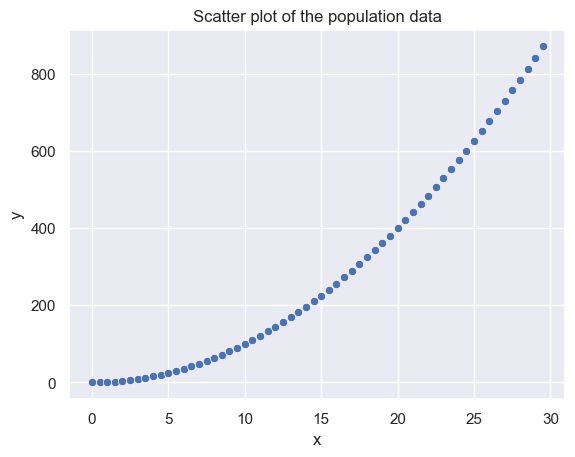

In [3]:
# Generate data
quadratic = np.vectorize(lambda x: x**2)
x = np.arange(0, 30, .5)
y = quadratic(x)

# Plot data
fig, ax = plt.subplots()
sns.scatterplot(x=x, y=y, ax=ax);
ax.set_xlabel("x");
ax.set_ylabel("y");
ax.set_title("Scatter plot of the population data");

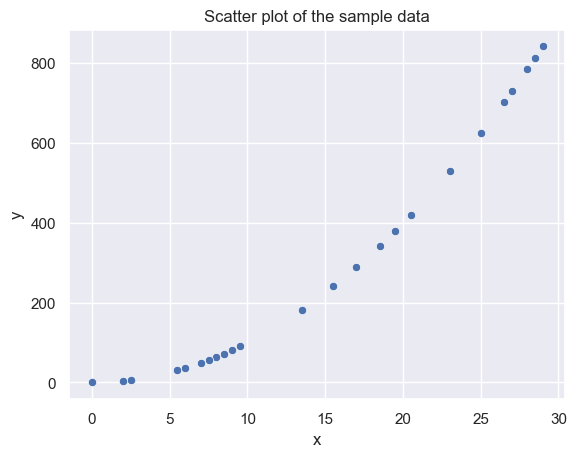

In [4]:
# Collect samples
Xs = []
ys = []

# Possibilities
pos = [i for i in range(x.shape[0])]

# Get 30 samples
for _ in range(30):
    i = random.choice(pos)
    Xs.append(x[i])
    ys.append(y[i])

# Make X 2d array (needed for sklearn library)
Xs = np.array([Xs]).T

# Plot data
fig, ax = plt.subplots()
sns.scatterplot(x=Xs[:, 0], y=ys, ax=ax);
ax.set_xlabel("x");
ax.set_ylabel("y");
ax.set_title("Scatter plot of the sample data");

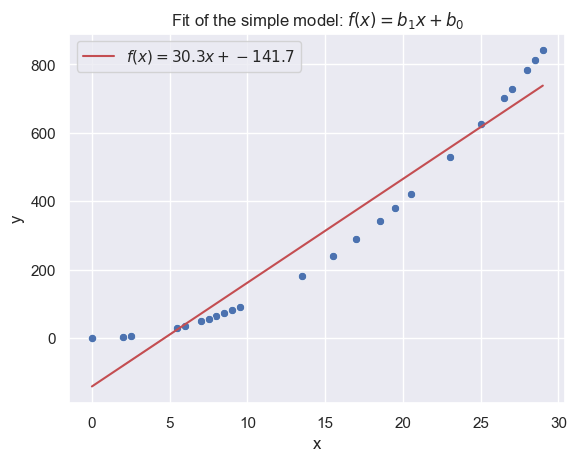

In [5]:
# Fit the model
lr1 = LinearRegression().fit(Xs, ys)

# Get predictions of the model
yhat = lr1.predict(Xs)

# Visulize it
# -- Define plot
fig, ax = plt.subplots()

# -- Plot training data
sns.scatterplot(x=Xs[:, 0], y=ys, ax=ax);

# -- Plot fitted line
label = '$f(x) = {:.1f} x + {:.1f}$'.format(lr1.coef_[0], lr1.intercept_)
sns.lineplot(x=Xs[:, 0], y=yhat, ax=ax, color='r', label=label);

# -- Add labels
ax.set_xlabel("x");
ax.set_ylabel("y");
ax.set_title("Fit of the simple model: $f(x) = b_1 x + b_0$");

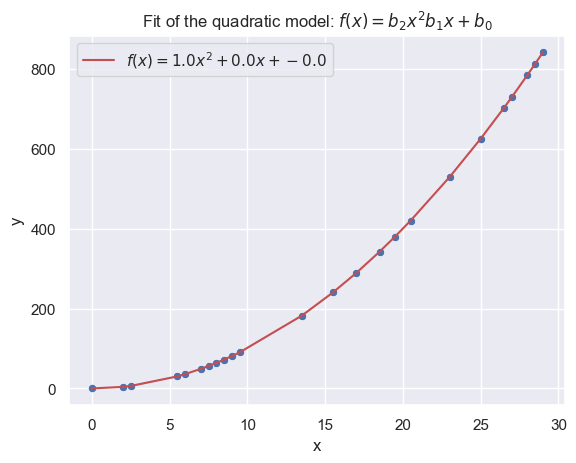

In [6]:
# Fit the model
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()).fit(Xs, ys)

# Get predictions of the model
yhat2 = pipe.predict(Xs)

# Visulize it
# -- Define plot
fig, ax = plt.subplots()

# -- Plot training data
sns.scatterplot(x=Xs[:, 0], y=ys, ax=ax);

# -- Plot fitted line
lr2 = pipe.get_params()["linearregression"]
label = '$f(x) = {:.1f} x^2 + {:.1f} x + {:.1f}$'.format(lr2.coef_[-1], lr2.coef_[-2], lr2.intercept_)
sns.lineplot(x=Xs[:, 0], y=yhat2, ax=ax, color='r', label=label);

# -- Add labels
ax.set_xlabel("x");
ax.set_ylabel("y");
ax.set_title("Fit of the quadratic model: $f(x) = b_2 x^2 b_1 x + b_0$");

In [7]:
def fit(X, y):
    # Add constant column
    A = Xs[:, 0][:, np.newaxis]**[1, 0]

    # Compute B and return
    return (inv((A.T @ A)) @ A.T) @ y

# Train the model
b1, b0 = fit(Xs, ys)

# Show the fitted parameters
print("f(x) = {:.1f}x + {:.1f}".format(b1, b0))

f(x) = 30.3x + -141.7


Exercise 7

In [8]:
points = np.array([[-1, 1], [1, 0], [3, -3]])
points

array([[-1,  1],
       [ 1,  0],
       [ 3, -3]])

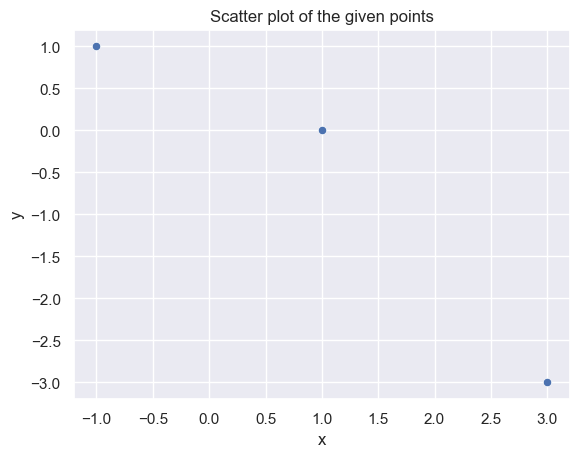

In [9]:
# Plot data
fig, ax = plt.subplots()
sns.scatterplot(x=points[:, 0], y=points[:, 1], ax=ax);
ax.set_xlabel("x");
ax.set_ylabel("y");
ax.set_title("Scatter plot of the given points");

In [10]:
A = np.array([[-1, 1 , 3], [1, 1, 1]]).T
A

array([[-1,  1],
       [ 1,  1],
       [ 3,  1]])

In [11]:
y = np.array([[1, 0 , -3]]).T

In [13]:
pb = inv((A.T @ A)) @ A.T @ y
pb 

array([[-1.        ],
       [ 0.33333333]])

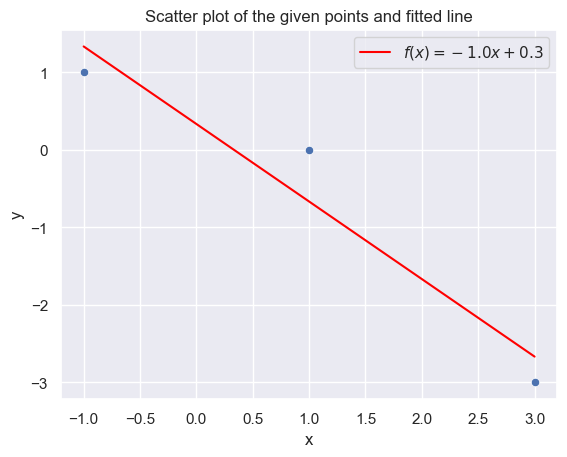

In [14]:
# Compute the projected vector p
p = A @ pb

# Plot the line with the underlying points
fig, ax = plt.subplots()

sns.scatterplot(x=points[:, 0], y=points[:, 1], ax=ax);
label = '$f(x) = {:.1f} x + {:.1f}$'.format(pb[0, 0], pb[1, 0])
sns.lineplot(x=points[:, 0], y=p[:, 0], ax=ax, color='red', label=label);

ax.set_xlabel("x");
ax.set_ylabel("y");
ax.set_title("Scatter plot of the given points and fitted line");

Exercise 8

In [15]:
points = np.array([(0, 0), (2, 2), (3, 6), (4, 12)])
points

array([[ 0,  0],
       [ 2,  2],
       [ 3,  6],
       [ 4, 12]])

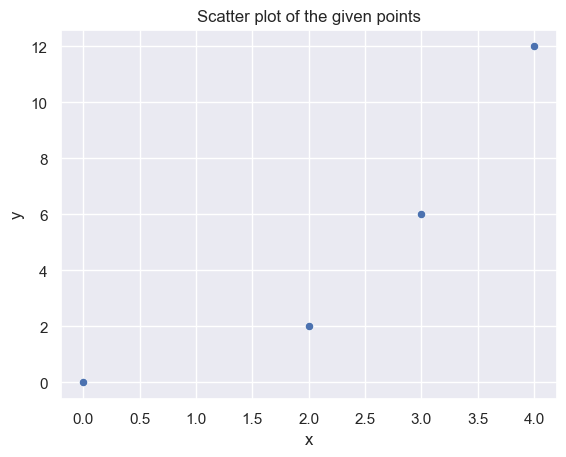

In [16]:
# Plot data
fig, ax = plt.subplots()
sns.scatterplot(x=points[:, 0], y=points[:, 1], ax=ax);
ax.set_xlabel("x");
ax.set_ylabel("y");
ax.set_title("Scatter plot of the given points");

In [17]:
A = np.array([[0,4, 9 ,16], [0, 2, 3, 4], [1, 1, 1, 1]]).T
A

array([[ 0,  0,  1],
       [ 4,  2,  1],
       [ 9,  3,  1],
       [16,  4,  1]])

In [18]:
y = np.array([[0, 2 , 6, 12]]).T
y

array([[ 0],
       [ 2],
       [ 6],
       [12]])

In [19]:
pb = inv((A.T @ A)) @ A.T @ y
pb

array([[ 1.0000000e+00],
       [-1.0000000e+00],
       [ 4.4408921e-16]])

In [20]:
x = np.arange(0, 5, .25)
x2 = x**2
const = [1]*len(x)
X = np.vstack((x2, x, const)).T
X

array([[ 0.    ,  0.    ,  1.    ],
       [ 0.0625,  0.25  ,  1.    ],
       [ 0.25  ,  0.5   ,  1.    ],
       [ 0.5625,  0.75  ,  1.    ],
       [ 1.    ,  1.    ,  1.    ],
       [ 1.5625,  1.25  ,  1.    ],
       [ 2.25  ,  1.5   ,  1.    ],
       [ 3.0625,  1.75  ,  1.    ],
       [ 4.    ,  2.    ,  1.    ],
       [ 5.0625,  2.25  ,  1.    ],
       [ 6.25  ,  2.5   ,  1.    ],
       [ 7.5625,  2.75  ,  1.    ],
       [ 9.    ,  3.    ,  1.    ],
       [10.5625,  3.25  ,  1.    ],
       [12.25  ,  3.5   ,  1.    ],
       [14.0625,  3.75  ,  1.    ],
       [16.    ,  4.    ,  1.    ],
       [18.0625,  4.25  ,  1.    ],
       [20.25  ,  4.5   ,  1.    ],
       [22.5625,  4.75  ,  1.    ]])

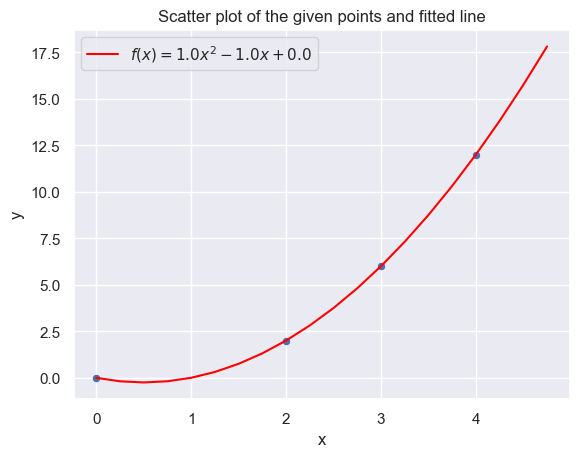

In [21]:
# Compute the projected vector p
p = X @ pb

# Plot the line with the underlying points
fig, ax = plt.subplots()

sns.scatterplot(x=points[:, 0], y=points[:, 1], ax=ax);
label = '$f(x) = {:.1f} x^2 {:.1f} x + {:.1f}$'.format(pb[0, 0], pb[1, 0], pb[2, 0])
sns.lineplot(x=X[:, 1], y=p[:, 0], ax=ax, color='red', label=label);

ax.set_xlabel("x");
ax.set_ylabel("y");
ax.set_title("Scatter plot of the given points and fitted line");

In [ ]:
Exercise 9

In [22]:
points = np.array([(-1, 1),(0, 0),(1, 2),(2, 3)])
points

array([[-1,  1],
       [ 0,  0],
       [ 1,  2],
       [ 2,  3]])

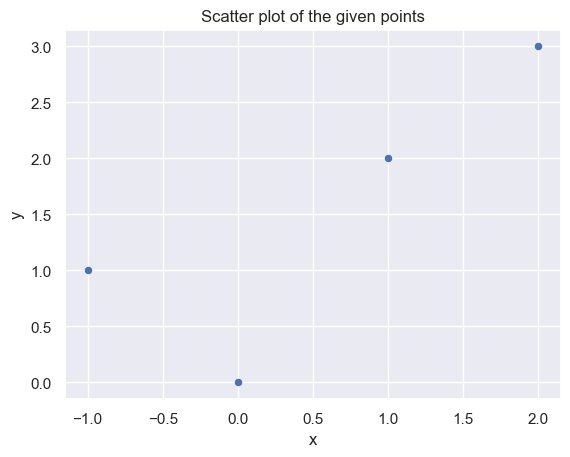

In [23]:
# Plot data
fig, ax = plt.subplots()
sns.scatterplot(x=points[:, 0], y=points[:, 1], ax=ax);
ax.set_xlabel("x");
ax.set_ylabel("y");
ax.set_title("Scatter plot of the given points");

In [24]:
A = np.array([[1, 0, 1, 4], [1, 1, 1, 1]]).T
A

array([[1, 1],
       [0, 1],
       [1, 1],
       [4, 1]])

In [25]:
y = np.array([[1, 0 , 2, 3]]).T
y

array([[1],
       [0],
       [2],
       [3]])

In [26]:
pb = inv((A.T @ A)) @ A.T @ y
pb

array([[0.66666667],
       [0.5       ]])

In [27]:
x = np.arange(-2, 3, .25)
x2 = x**2
const = [1]*len(x)
X = np.vstack((x2, const)).T
X

array([[4.    , 1.    ],
       [3.0625, 1.    ],
       [2.25  , 1.    ],
       [1.5625, 1.    ],
       [1.    , 1.    ],
       [0.5625, 1.    ],
       [0.25  , 1.    ],
       [0.0625, 1.    ],
       [0.    , 1.    ],
       [0.0625, 1.    ],
       [0.25  , 1.    ],
       [0.5625, 1.    ],
       [1.    , 1.    ],
       [1.5625, 1.    ],
       [2.25  , 1.    ],
       [3.0625, 1.    ],
       [4.    , 1.    ],
       [5.0625, 1.    ],
       [6.25  , 1.    ],
       [7.5625, 1.    ]])

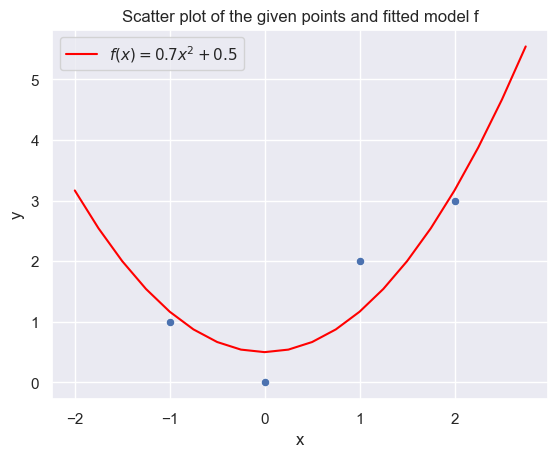

In [28]:
# Compute the projected vector p
p = X @ pb

# Plot the line with the underlying points
fig, ax = plt.subplots()

sns.scatterplot(x=points[:, 0], y=points[:, 1], ax=ax);
label = '$f(x) = {:.1f} x^2 + {:.1f}$'.format(pb[0, 0], pb[1, 0])
sns.lineplot(x=x, y=p[:, 0], ax=ax, color='red', label=label);

ax.set_xlabel("x");
ax.set_ylabel("y");
ax.set_title("Scatter plot of the given points and fitted model f");